In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

t=np.linspace(-1,1,100)
x=t+t**2
y=t-t**2
xm=np.min(x)-1.5
xM=np.max(x)+1.5
ym=np.min(y)-1.5
yM=np.max(y)+1.5
N=50
s=np.linspace(-1,1,N)
xx=s+s**2
yy=s-s**2


data=[
    dict(x=x, y=y, 
           mode='lines', 
           line=dict(width=2, color='blue')
          ),
#       dict(x=x, y=y, 
#            mode='lines', 
#            line=dict(width=2, color='blue')
#           )
    ]

layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
            yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
            title='Kinematic Generation of a Planar Curve', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

frames=[dict(data=[dict(x=[xx[k]], 
                        y=[yy[k]], 
                        mode='lines+markers', 
                        fill = 'tonextx',
                        marker=dict(color='black', size=10)
                        )
                  ]) for k in range(N)]    
          
figure1=dict(data=data, layout=layout, frames=frames)          
iplot(figure1)

In [ ]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.metric import Schwarzschild
from einsteinpy.utils import schwarzschild_radius

In [ ]:
!pip install einsteinpy==0.1

In [ ]:
import einsteinpy
einsteinpy.__version__

In [ ]:
M = 6e24 * u.kg
pos = [130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad]
vel = [0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s]

In [ ]:
vel,pos

In [ ]:
!pip install einsteinpy==0.1
import einsteinpy

M = 6e24 * u.kg
pos = [130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad]
vel = [0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s]

swc = Schwarzschild.from_spherical(pos, vel, 0 *u.s, M)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize": 5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)


import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import pandas as pd

init_notebook_mode(connected=True) #tells the notebook to load figures in offline mode



trace = go.Scatter(
    x = pos_x,
    y = pos_y,
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import pandas as pd

init_notebook_mode(connected=True) #tells the notebook to load figures in offline mode


In [ ]:
s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

# surface = go.Surface(x=x, y=y, z=z)
data = [go.Scatter(
    x=pos_x,
    y=pos_y,
#     fill='tozeroy'
)]

# layout = go.Layout(
#     title='Parametric Plot',
#     scene=dict(
#         xaxis=dict(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         yaxis=dict(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         zaxis=dict(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         )
#     )
# )

# fig = go.Figure(data=data)
iplot(data, filename='jupyter-parametric_plot')

In [ ]:
N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = pos_x,
    y = pos_y,
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

In [ ]:
%matplotlib inline
obj = ScatterGeodesicPlotter(M)
obj.plot(pos, vel, 0.002, 5e-8)
obj.show()

In [ ]:
!ls

In [ ]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from einsteinpy.utils import kerr_utils, schwarzschild_radius
from einsteinpy.utils import bl_coord_transforms

In [ ]:
M = 4e30
scr = schwarzschild_radius(M * u.kg).value
# for nearly maximally rotating black hole
a1 = 0.499999*scr
# for ordinary black hole
a2 = 0.3*scr

In [ ]:
ergo1, ergo2, hori1, hori2 = list(), list(), list(), list()
thetas = np.linspace(0, np.pi, 720)
for t in thetas:
    ergo1.append(kerr_utils.radius_ergosphere(M, a1, t, "Spherical"))
    ergo2.append(kerr_utils.radius_ergosphere(M, a2, t, "Spherical"))
    hori1.append(kerr_utils.event_horizon(M, a1, t, "Spherical"))
    hori2.append(kerr_utils.event_horizon(M, a2, t, "Spherical"))
ergo1, ergo2, hori1, hori2 = np.array(ergo1), np.array(ergo2), np.array(hori1), np.array(hori2)

In [ ]:
Xe1, Ye1 = ergo1[:,0] * np.sin(ergo1[:,1]), ergo1[:,0] * np.cos(ergo1[:,1])
Xh1, Yh1 = hori1[:,0] * np.sin(hori1[:,1]), hori1[:,0] * np.cos(hori1[:,1])
Xe2, Ye2 = ergo2[:,0] * np.sin(ergo2[:,1]), ergo2[:,0] * np.cos(ergo2[:,1])
Xh2, Yh2 = hori2[:,0] * np.sin(hori2[:,1]), hori2[:,0] * np.cos(hori2[:,1])

In [ ]:
Xe1

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
# for maximally rotating black hole
ax.fill(Xh1, Yh1, 'b', Xe1, Ye1, 'r', alpha=0.3)
ax.fill(-1*Xh1, Yh1, 'b', -1*Xe1, Ye1, 'r', alpha=0.3)

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill(Xh2, Yh2, 'b', Xe2, Ye2, 'r', alpha=0.3)
ax.fill(-1*Xh2, Yh2, 'b', -1*Xe2, Ye2, 'r', alpha=0.3)

In [ ]:
import plotly.offline
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=Xh1,
    y=Yh1,
    fill='tozeroy',
    marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
)
trace2 = go.Scatter(
    x=Xe1,
    y=Ye1,
    fill='tozeroy',
    marker=dict(
            size=17,
            color='rgb(255, 100, 0)',
            opacity=0.7
        ),
)
trace3 = go.Scatter(
    x=-1*Xh1,
    y=Yh1,
    fill='tozeroy',
    marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
)
trace4 = go.Scatter(
    x=-1*Xe1,
    y=Ye1,
    fill='tozeroy',
    marker=dict(
            size=17,
            color='rgb(255, 100, 0)',
            opacity=0.7
        ),
)
layout = go.Layout(
    xaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=-6000,
        dtick=2000,
        tickcolor='#000'
    ),
    yaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=-4000,
        dtick=2000,
        tickcolor='#000'
    )
)
data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-scatter')

In [ ]:
M = 1.989e30 * u.kg
pos_vec = [50e5 * u.km, np.pi / 2 * u.rad, np.pi * u.rad]
vel_vec = [0 * u.km / u.s, 0 * u.rad / u.s, 0 * u.rad / u.s]

In [ ]:
end_lambda = ((1 * u.year).to(u.s)).value / 930
# Choosing stepsize for ODE solver to be 0.02 minutes
stepsize = ((0.02 * u.min).to(u.s)).value

In [ ]:
pos_vec

In [ ]:
starting_time = 0 * u.s
a = 0.3
# obj = bl_coord_transforms.CartesianToBL_vel(pos_vec,vel_vec, a=a)
obj = bl_coord_transforms.BLToCartesian_pos(pos_vec, 0.3)

# ans = obj.calculate_trajectory(
#     end_lambda=end_lambda, OdeMethodKwargs={"stepsize": stepsize}, return_cartesian=True
# )
# x, y = ans[1][:,1], ans[1][:,2]

In [ ]:
pos_vec[0] + a*u.km

In [ ]:
pos_vec[0] ** 2 + a*u.km ** 2

In [ ]:
tmp = np.sqrt(pos_vec[0] ** 2 + a*u.km ** 2) * np.sin(pos_vec[1])
tmp

In [ ]:
tmp * np.cos(pos_vec[2])

In [ ]:
tmp * np.sin(pos_vec[2])

In [ ]:
pos_vec[0] * np.cos(pos_vec[1])

In [ ]:
r_vec = np.zeros(shape=(3,), dtype=float)
print(r_vec)
np.append(r_vec, tmp * np.cos(pos_vec[2]))
print(r_vec)
np.append(r_vec, tmp * np.sin(pos_vec[2]))
r_vec
np.append(r_vec, pos_vec[0] * np.cos(pos_vec[1]))


In [ ]:

r_vec = np.zeros(shape=(3,), dtype=float)
tmp = np.sqrt(pos_vec[0] ** 2 + a*u.km ** 2) * np.sin(pos_vec[1])
r_vec[0] = tmp * np.cos(pos_vec[2])
r_vec[1] = tmp * np.sin(pos_vec[2])
r_vec[2] = pos_vec[0] * np.cos(pos_vec[1])

In [ ]:
from astropy import units as u
import numpy as np
from einsteinpy.metric import Schwarzschild

In [ ]:
M = 1.989e30 * u.kg  # mass of sun
pos_vec = [147.09e6 * u.km, np.pi / 2 * u.rad, np.pi * u.rad]
speed_at_perihelion = 30.29 * u.km / u.s
omega = (u.rad * speed_at_perihelion) / pos_vec[0]
vel_vec = [0 * u.km / u.s, 0 * u.rad / u.s, omega]

In [ ]:
# Set lambda to complete an year.
# Lambda is always specified in secs
end_lambda = ((1 * u.year).to(u.s)).value
# Choosing stepsize for ODE solver to be 5 minutes
stepsize = ((5 * u.min).to(u.s)).value

In [ ]:
starting_time = 0 * u.s
obj = Schwarzschild.from_spherical(pos_vec, vel_vec, starting_time, M)
ans = obj.calculate_trajectory(
    end_lambda=end_lambda, OdeMethodKwargs={"stepsize": stepsize}, return_cartesian=True
)

In [4]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

init_notebook_mode(connected=True)

t=np.linspace(-1,1,100)
x=t+t**2
y=t-t**2
xm=np.min(x)-1.5
xM=np.max(x)+1.5
ym=np.min(y)-1.5
yM=np.max(y)+1.5
N=5
s=np.linspace(-1,1,N)
xx=s+s**2
yy=s-s**2

# r = 5
# x = np.array([ i for i in range(-5,5,1)])
# y = np.array([(r**2-i**2)**2 for i in x])

# import matplotlib.pyplot as plt
# plt.plot(y,x)
# plt.show()


data=[dict(x=x, y=y, 
           mode='lines', 
           line=dict(width=2, color='blue')
          ),
      dict(x=x, y=y, 
           mode='lines', 
           line=dict(width=2, color='green')
          )
    ]

layout=dict(xaxis=dict(range=[xm, xM+10], autorange=False, zeroline=False),
            yaxis=dict(range=[ym, yM+10], autorange=False, zeroline=False),
            title='Kinematic Generation of a Planar Curve', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

frames=[dict(data=[dict(x=[xx[k]], 
                        y=[yy[k]], 
                        mode='markers', 
                        marker=dict(color='red', size=10)
                        )
                  ]) for k in range(N)]    
          
figure1=dict(data=data, layout=layout, frames=frames)          
iplot(figure1)

In [102]:
import numpy as np

# data = [dict(
#         visible = False,
#         line=dict(color='#00CED1', width=6),
#         name = '𝜈 = '+str(step),
#         x = np.arange(0,10,0.01),
#         y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),1000)]
data[5]['visible'] = True

# iplot(data, filename='Single Sine Wave')

In [103]:
# data = [dict(
#         visible = False,
#         line=dict(color='#00CED1', width=6),
#         name = '𝜈 = '+str(step),
#         x = pos_x,
#         y = pos_y) for i in range(len(pos_x[1:100]))]
# data[10]['visible'] = True


steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

iplot(fig, filename='Sine Wave Slider')

In [15]:
[(pos_x, pos_y) for i in range(len(pos_x[1:100]))][0]

(array([120.10433923, 120.10810263, 120.14381021, ..., 129.68087916,
        129.72841657, 129.77214751]),
 array([-49.74884621, -49.73971102, -49.64756193, ...,  -0.69144408,
         -0.59265485,  -0.49384824]))

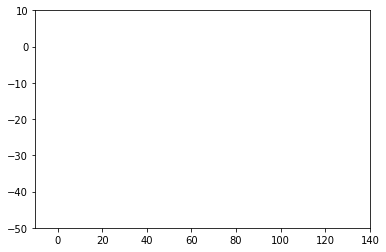

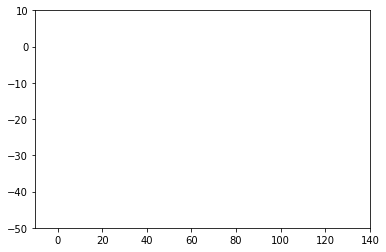

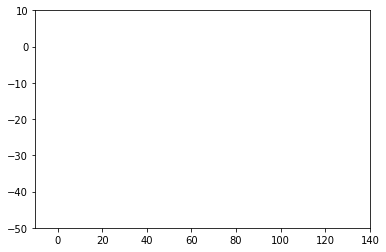

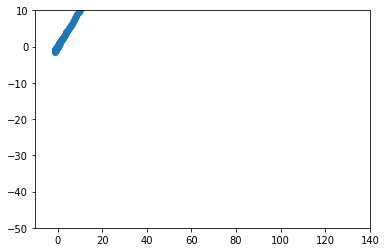

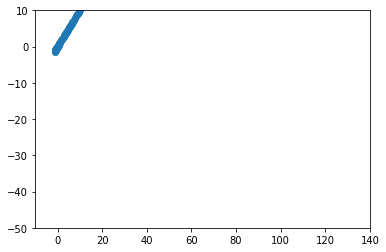

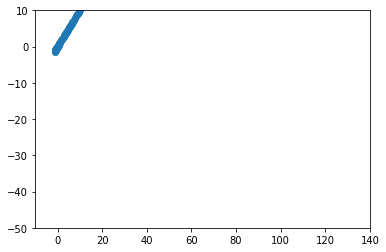

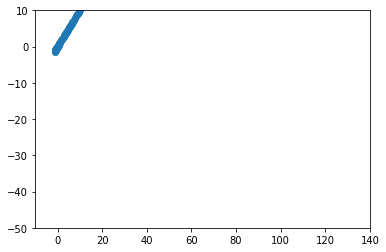

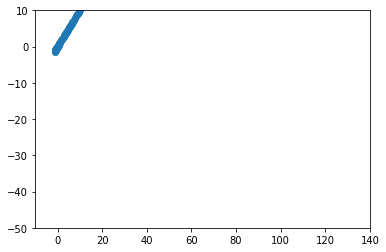

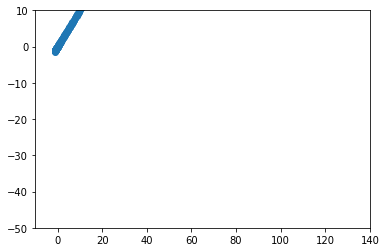

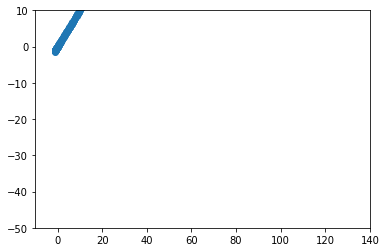

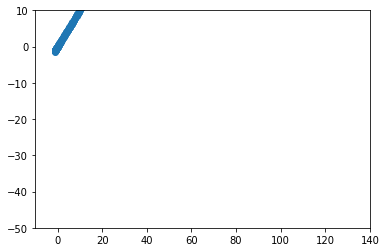

In [62]:
import matplotlib.pyplot as plt
for i in range(len(pos_x)):
    plt.scatter(chunks_x[:i],chunks_x[:i])
    plt.ylim(-50,10)
    plt.xlim(-10,140)
    plt.show()

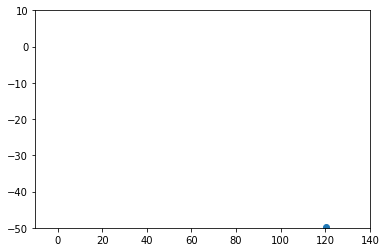

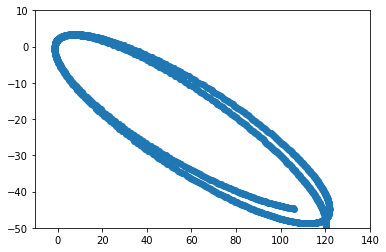

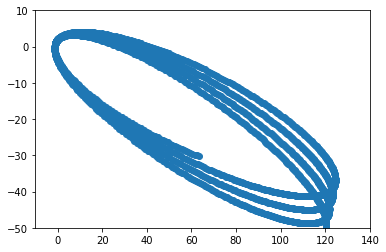

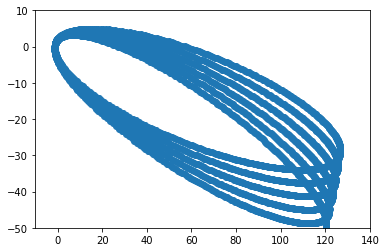

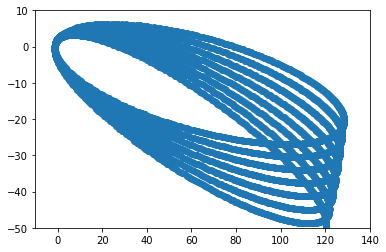

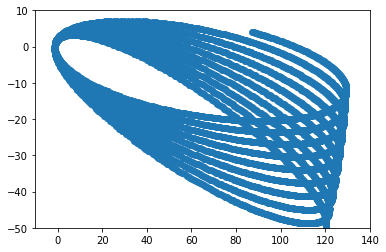

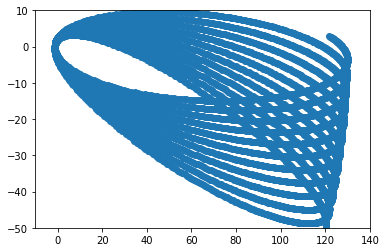

In [99]:
for i in range(1,len(pos_x),1000):
#     print(pos_x[:i])
    plt.scatter(pos_x[:i],pos_y[:i])
    plt.ylim(-50,10)
    plt.xlim(-10,140)
    plt.show()

In [98]:
len(pos_x)/1000

6.463

In [61]:
chunks_x = [pos_x[x:x+100] for x in range(0, len(pos_x), int(len(pos_x)/10))]
chunks_y = [pos_y[x:x+100] for x in range(0, len(pos_y), int(len(pos_x)/10))]


In [82]:
for i in range(len(chunks_x)):
    print(len(chunks_x[0:i][0]))
#     print("==================================================================================================================================================================================================================================================================================================")

IndexError: list index out of range

In [86]:
type(chunks_x[0:i][1])

numpy.ndarray

In [84]:
i=2

In [40]:
[len(chunks_x[i]) for i in range(len(chunks_x))]

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 63]

In [36]:
data = [dict(
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]

In [37]:
data

[{'x': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
         0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
         0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
         0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
         0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
         0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
         0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
         0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
         0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
         1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
         1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
         1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
         1.43, 1.44,

In [1]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential
from einsteinpy.metric import Schwarzschild


In [2]:
M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

In [3]:
swc = Schwarzschild.from_spherical(sph_obj, M, 0 * u.s)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize":  5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)
frames = pos_x.shape[0]
x_max, x_min = max(pos_x), min(pos_x)
y_max, y_min = max(pos_y), min(pos_y)
margin_x = (x_max - x_min) * 0.1
margin_y = (y_max - y_min) * 0.1

In [ ]:
# !pip install poliastro
import numpy as np
from poliastro.examples import *

from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Scatter3d, Surface

init_notebook_mode(connected=True)

rr = molniya.sample()

trace = Scatter3d(
    x=rr.x.value, y=rr.y.value, z=rr.z.value,
    line=dict(
        color='#000000',
        width=5,
    ),
    mode="lines",
)

radius = molniya.attractor.R.to(u.km).value

uu, vv = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
xx = radius * np.cos(uu) * np.sin(vv)
yy = radius * np.sin(uu) * np.sin(vv)
zz = radius * np.cos(vv)

planet = Surface(
    x=xx,
    y=yy,
    z=zz,
    cauto=False,
    cmin=1,
    cmax=1,
    colorscale=[[0, '#204a87'], [1, '#204a87']],
    showscale=False
    
)


data = [trace, planet]

layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Orbit plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1.5 ),
        #aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='orbit-plot', image_height=700, validate=False)